# Tuning SARSA agent

1) During the first experiments and tests of our SARSA agent, it was not clear if glei strategy was more efficient than a basic epsilon greedy (strategy whre that we don't decay epsilon through training).  
Therefore, we will first study the differences between the glei and the normal strategies.  
**Results are interesting: they highlight the fact that glei strategy has no advantages (in terms of optimality and speed of convergence) for every epsilon above 0.2 and under 0.001.**  
**However, for epsilon of 0.005 & 0.01, glei strategy converges better and faster**

2) Then, the grid search highlights that the best set of parameter is:
    * Use GLEI strategy
    * starting epsilon: 0.005
    * alpha: 0.1
    * gamma: 1

## 0. Libraries

In [1]:
import gymnasium as gym
import numpy as np
from agents.sarsa import Sarsa
from agents.qlearning import QLearning

from utils.encoding import mc_tile_encoding
from utils.utils_fct import plot_moving_averages, process_json
from utils.policy import epsilon_greedy_policy, softmax_policy

# 1. Testing agent

In [3]:
env = gym.make("MountainCar-v0", render_mode=None)

sarsa_agent = Sarsa(
    encode_fct=mc_tile_encoding,
    policy=softmax_policy,
    nb_actions=env.action_space.n,
)

_ = sarsa_agent.train(
    env=env,
    alpha=0.1,
    gamma=1,
    verbose=1,
    nb_episodes=1000,
    # use_glei=True,
    # epsilon=0.01,
)

_ = sarsa_agent.evaluate_policy(env=env, nb_episodes=10, verbose=1)  # , epsilon=0)

Episode 1: Total Reward = -200.0
Episode 2: Total Reward = -200.0
Episode 3: Total Reward = -200.0
Episode 4: Total Reward = -200.0
Episode 5: Total Reward = -200.0
Episode 6: Total Reward = -200.0
Episode 7: Total Reward = -200.0
Episode 8: Total Reward = -200.0
Episode 9: Total Reward = -200.0
Episode 10: Total Reward = -200.0
Episode 11: Total Reward = -200.0
Episode 12: Total Reward = -200.0
Episode 13: Total Reward = -200.0
Episode 14: Total Reward = -200.0
Episode 15: Total Reward = -200.0
Episode 16: Total Reward = -200.0
Episode 17: Total Reward = -200.0
Episode 18: Total Reward = -200.0
Episode 19: Total Reward = -200.0
Episode 20: Total Reward = -200.0
Episode 21: Total Reward = -200.0
Episode 22: Total Reward = -200.0
Episode 23: Total Reward = -200.0
Episode 24: Total Reward = -200.0
Episode 25: Total Reward = -200.0
Episode 26: Total Reward = -200.0
Episode 27: Total Reward = -200.0
Episode 28: Total Reward = -200.0
Episode 29: Total Reward = -200.0
Episode 30: Total Rewar

## 2. Studying the Impact of GLEI Strategy on $\epsilon$-Greedy Policy

In [ ]:
glei_tune_historic = sarsa_agent.grid_search(
    env=env,
    alpha_values=[0.1],
    gamma_values=[0.99],
    epsilon_values=[0.005, 0.01, 0.1, 0.2, 0.4],
    nb_episodes=1000,
    nb_iter=10,
    use_glei=True,
    verbose=False,
)

no_glei_tune_historic = sarsa_agent.grid_search(
    env=env,
    alpha_values=[0.1],
    gamma_values=[0.99],
    epsilon_values=[0.005, 0.01, 0.1, 0.2, 0.4],
    nb_episodes=1000,
    nb_iter=10,
    use_glei=False,
    verbose=False,
)

data_dict = {**no_glei_tune_historic, **glei_tune_historic}
process_json("./data/sarsa/glei_vs_noglei", "w", data_dict=data_dict)

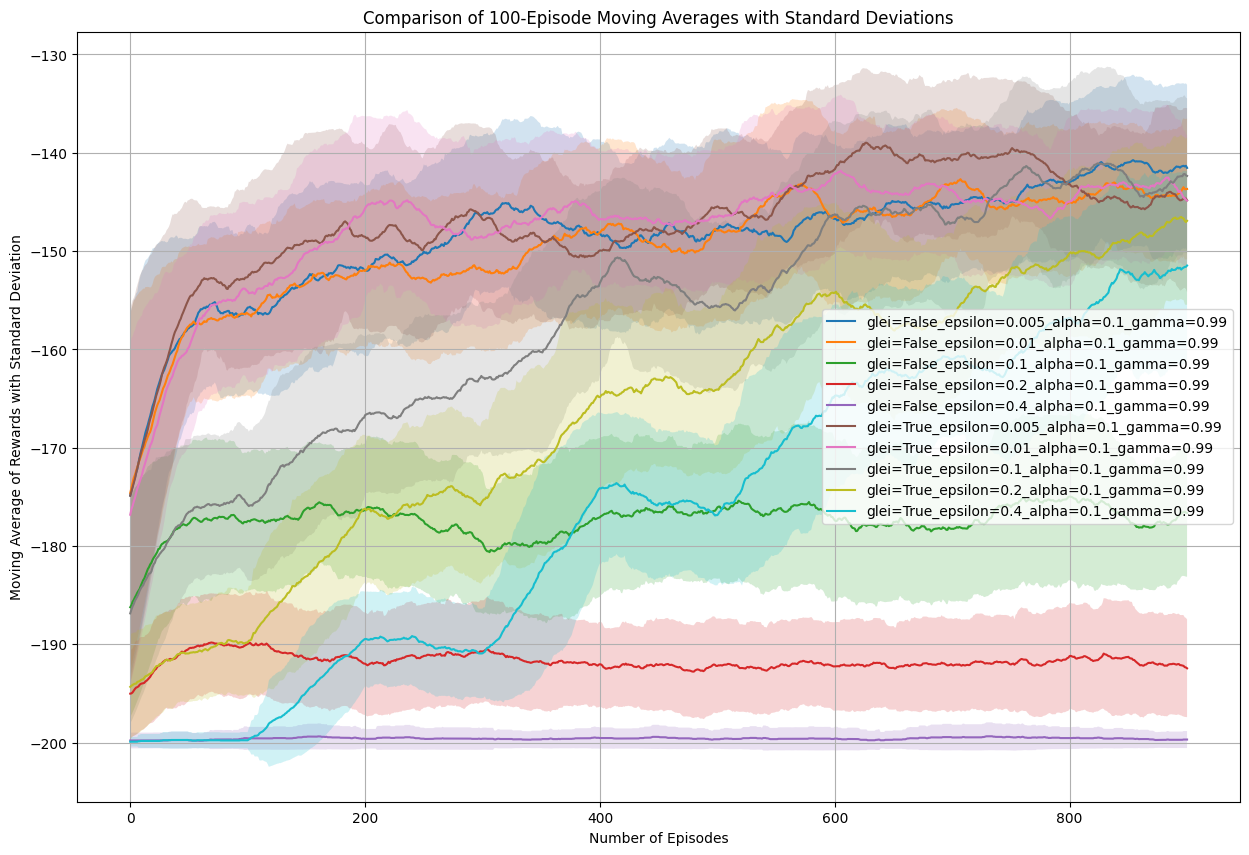

In [8]:
plot_moving_averages(
    process_json("./data/sarsa/glei_vs_noglei", "r"),
    nb_episodes=1000,
    window_size=100,
)

## 3. Searching best $\alpha$ and $\gamma$ for SARSA Agent

In [8]:
alpha_gamma_tune_historic = sarsa_agent.grid_search(
    env=env,
    alpha_values=[0.005, 0.01, 0.1],
    gamma_values=[0.9, 0.99, 1],
    epsilon_values=[0.005],
    nb_episodes=1000,
    nb_iter=10,
    use_glei=True,
    verbose=False,
)
process_json(
    "./data/sarsa/alpha_gamma_search_epsilon=0.005_glei=true_3",
    "w",
    data_dict=alpha_gamma_tune_historic,
)

Dictionary saved to ./data/sarsa/alpha_gamma_search_epsilon=0.005_glei=true_3


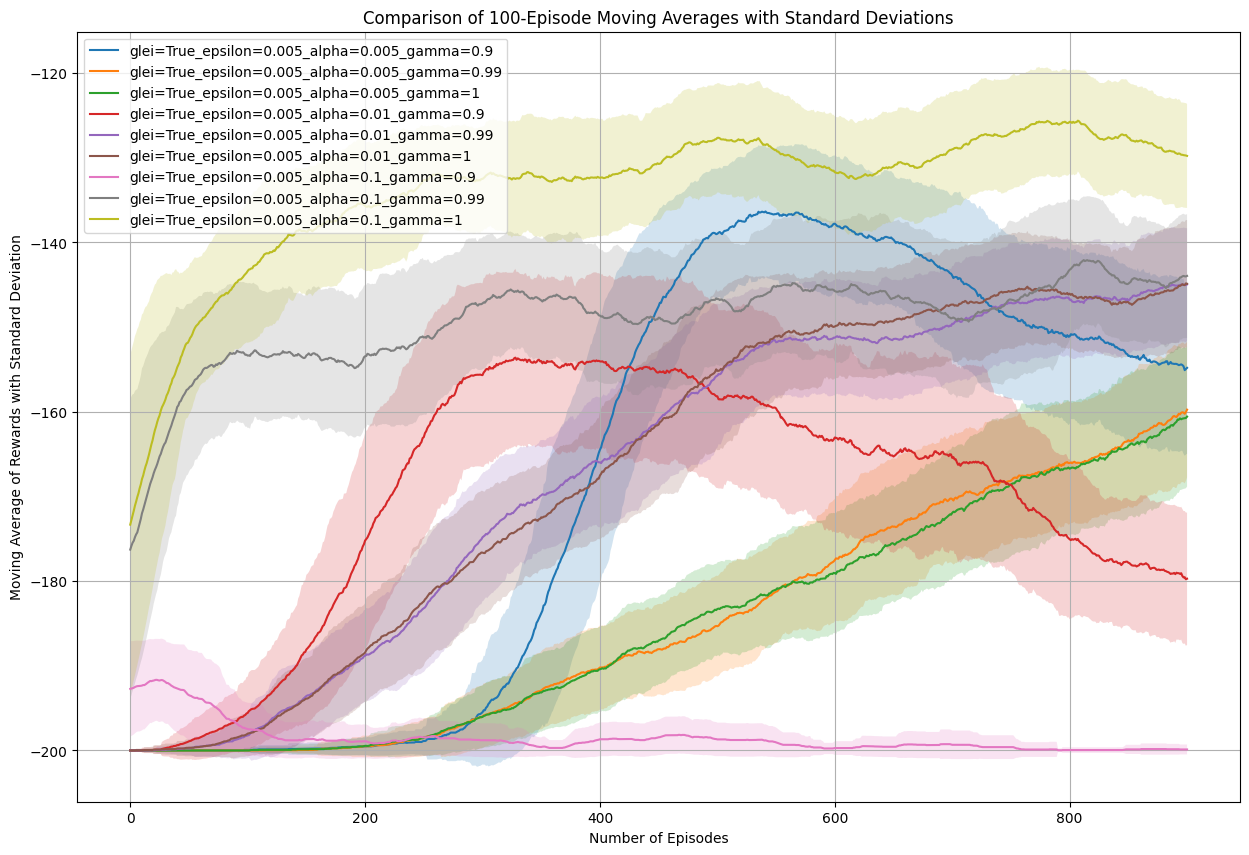

In [7]:
plot_moving_averages(
    process_json("./data/sarsa/alpha_gamma_search_epsilon=0.005_glei=true_2", "r"),
    nb_episodes=1000,
    window_size=100,
)

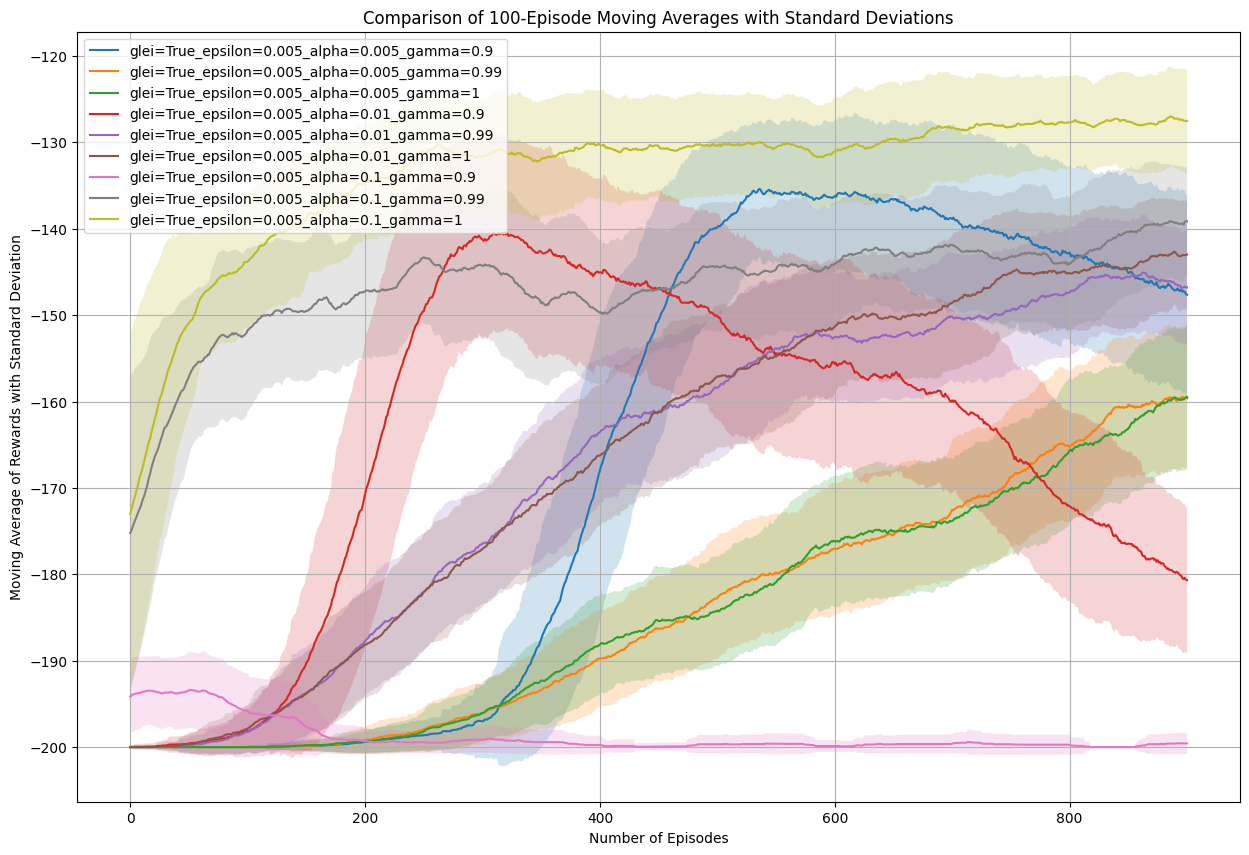

In [9]:
plot_moving_averages(
    process_json("./data/sarsa/alpha_gamma_search_epsilon=0.005_glei=true_3", "r"),
    nb_episodes=1000,
    window_size=100,
)

## 4. Same for sarsa with update with eps greedy

In [5]:
from agents.sarsa_eps_greedy import SarsaEpsGreedy

In [7]:
env = gym.make("MountainCar-v0", render_mode=None)

sarsa_eps_greedy_agent = SarsaEpsGreedy(
    encode_fct=mc_tile_encoding,
    nb_actions=env.action_space.n,
)

In [8]:
glei_tune_historic = sarsa_eps_greedy_agent.grid_search(
    env=env,
    alpha_values=[0.1],
    gamma_values=[0.99],
    epsilon_values=[0.005, 0.01, 0.1, 0.2, 0.4],
    nb_episodes=1000,
    nb_iter=10,
    use_glei=True,
    verbose=False,
)

no_glei_tune_historic = sarsa_eps_greedy_agent.grid_search(
    env=env,
    alpha_values=[0.1],
    gamma_values=[0.99],
    epsilon_values=[0.005, 0.01, 0.1, 0.2, 0.4],
    nb_episodes=1000,
    nb_iter=10,
    use_glei=False,
    verbose=False,
)

data_dict = {**no_glei_tune_historic, **glei_tune_historic}
process_json("./data/sarsa_eps_greedy/glei_vs_noglei", "w", data_dict=data_dict)

Dictionary saved to ./data/sarsa_eps_greedy/glei_vs_noglei


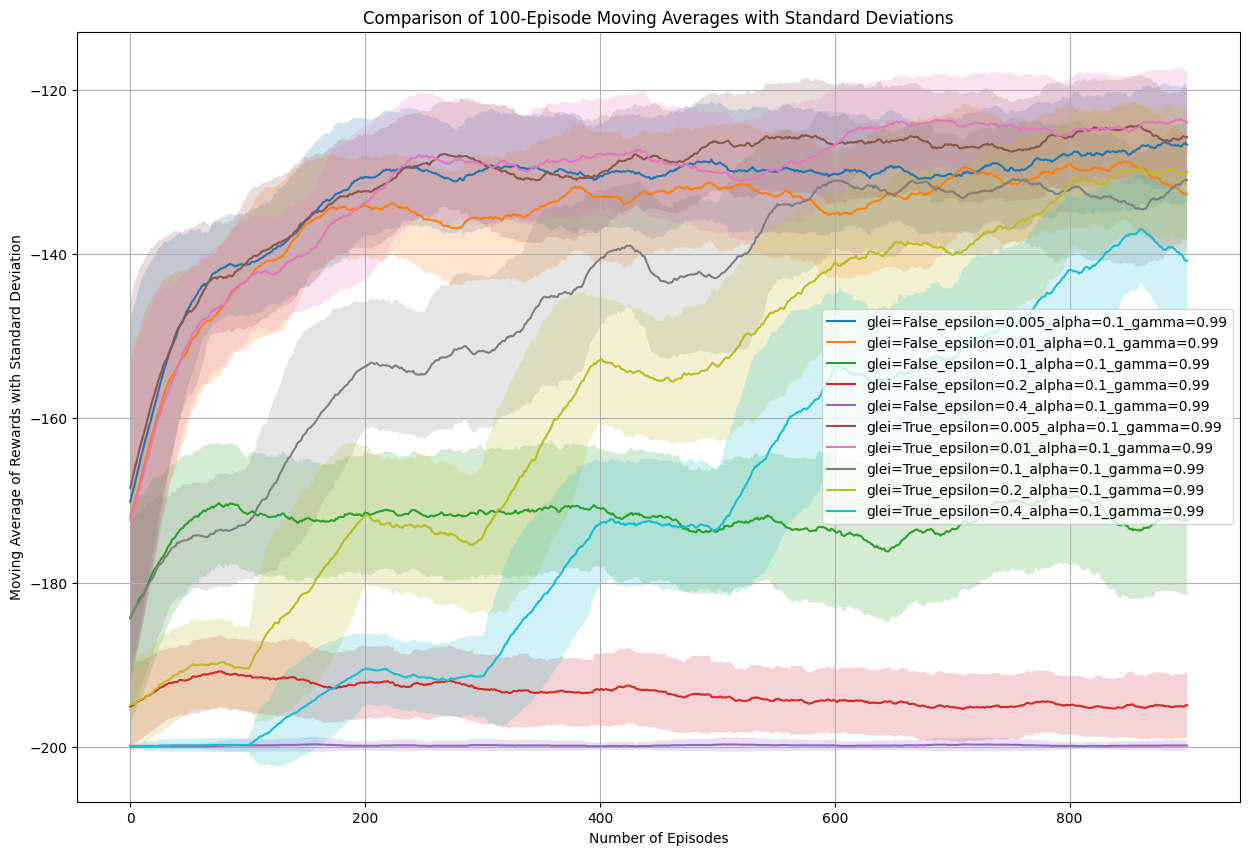

In [9]:
plot_moving_averages(
    process_json("./data/sarsa_eps_greedy/glei_vs_noglei", "r"),
    nb_episodes=1000,
    window_size=100,
)

In [10]:
alpha_gamma_tune_historic = sarsa_eps_greedy_agent.grid_search(
    env=env,
    alpha_values=[0.005, 0.01, 0.1],
    gamma_values=[0.9, 0.99, 1],
    epsilon_values=[0.005],
    nb_episodes=1000,
    nb_iter=10,
    use_glei=True,
    verbose=False,
)
process_json(
    "./data/sarsa_eps_greedy/alpha_gamma_search_epsilon=0.005_glei=true",
    "w",
    data_dict=alpha_gamma_tune_historic,
)

Dictionary saved to ./data/sarsa_eps_greedy/alpha_gamma_search_epsilon=0.005_glei=true


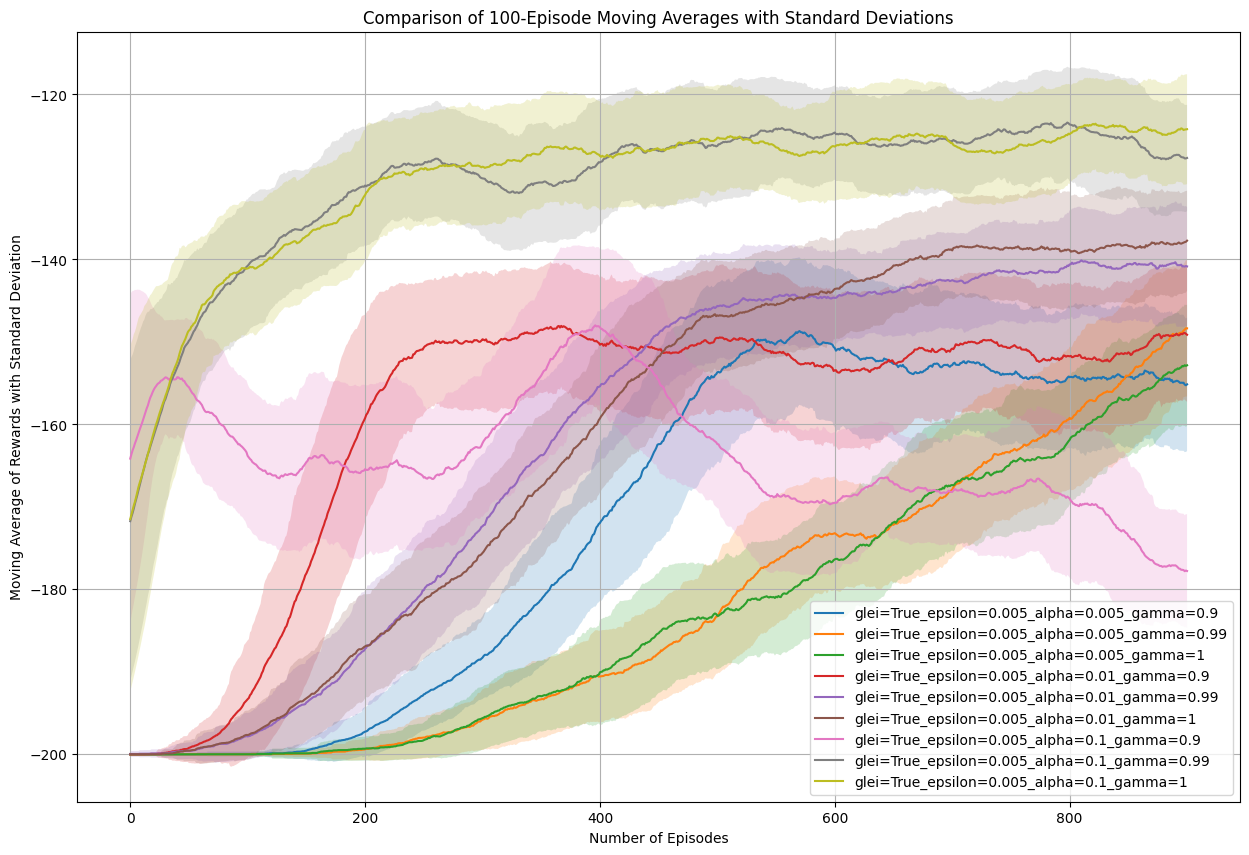

In [11]:
plot_moving_averages(
    process_json(
        "./data/sarsa_eps_greedy/alpha_gamma_search_epsilon=0.005_glei=true", "r"
    ),
    nb_episodes=1000,
    window_size=100,
)